**SOLUBILITY**

Solubility refers to the capacity of a drug to dissolve in a solvent, typically water or biological fluids. In pharmacology, it is a crucial property that influences various aspects of drug development and therapeutic efficacy

In [1]:
! pip3 install rdkit

import numpy as np
import rdkit
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 42.2 MB/s eta 0:00:00


In [2]:
from google.colab import files
data=files.upload()

Saving DOWNLOAD-CUC7SguObJEIkPWSqWLaUAEoQGVmVCLFK4ujZGyxiyM=.csv to DOWNLOAD-CUC7SguObJEIkPWSqWLaUAEoQGVmVCLFK4ujZGyxiyM=.csv


In [8]:
df = pd.read_csv('DOWNLOAD-CUC7SguObJEIkPWSqWLaUAEoQGVmVCLFK4ujZGyxiyM=.csv',on_bad_lines='skip',sep=';')
#By using on_bad_lines='skip', you instruct pandas to skip any problematic lines instead of raising an error.

In [9]:
df.head()
#returns the first 5 rows to get a peak into the structure and values of the dataframe

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value
0,CHEMBL253309,NaN,NaN,563.79,1.0,3.30,"3, cyclo(-L-Am7(S2Py)-Aib-L-Leu-D-Pro-)",CC(C)C[C@@H]1NC(=O)C(C)(C)NC(=O)[C@H](CCCCCSSc...,IC50,'=',...,SINGLE PROTEIN,CHEMBL1140755,1,Scientific Literature,Bioorg Med Chem,2008,NaN,NaN,NaN,NaN
1,CHEMBL269935,NaN,NaN,289.33,0.0,4.31,2,O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1,IC50,'>',...,SINGLE PROTEIN,CHEMBL1143185,1,Scientific Literature,Bioorg Med Chem Lett,2008,NaN,NaN,NaN,NaN
2,CHEMBL437029,NaN,NaN,521.62,2.0,5.43,56,C[C@H]1CN(c2ccc(C(=O)Nc3cc(-c4ccccc4)ccc3N)cn2...,IC50,'>',...,SINGLE PROTEIN,CHEMBL1143185,1,Scientific Literature,Bioorg Med Chem Lett,2008,NaN,NaN,NaN,NaN
3,CHEMBL3639926,NaN,NaN,411.55,0.0,4.88,BDBM110013,Cc1cc(C)c(Nc2ccc(C(=O)N(C)CCCCCCC(=O)NO)cc2)c(...,IC50,'=',...,SINGLE PROTEIN,CHEMBL3639257,37,BindingDB Database,NaN,2013,NaN,NaN,NaN,NaN
4,CHEMBL3693779,NaN,NaN,496.55,1.0,5.09,BDBM110029,COC(c1ccc(F)cc1)(c1ccc(F)cc1)c1ccc(C(=O)NCCCCC...,IC50,'=',...,SINGLE PROTEIN,CHEMBL3639257,37,BindingDB Database,NaN,2013,NaN,NaN,NaN,NaN


In [6]:
df.shape
#checking the number of rows and columns in the dataframe

(5525, 1)

In [34]:
selected_columns=['Smiles','Standard Type','Standard Value']
filter_df = pd.DataFrame(df,columns=selected_columns)
filter_df.head()
#to have only the required columns in the dataframe - the canonical smiles notation and the value of solubility of the compound

,Smiles,Standard Type,Standard Value
0,CC(C)C[C@@H]1NC(=O)C(C)(C)NC(=O)[C@H](CCCCCSSc...,IC50,230.0
1,O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1,IC50,50000.0
2,C[C@H]1CN(c2ccc(C(=O)Nc3cc(-c4ccccc4)ccc3N)cn2...,IC50,50000.0
3,Cc1cc(C)c(Nc2ccc(C(=O)N(C)CCCCCCC(=O)NO)cc2)c(...,IC50,35.0
4,COC(c1ccc(F)cc1)(c1ccc(F)cc1)c1ccc(C(=O)NCCCCC...,IC50,13.0


In [35]:
selected_columns = ['Smiles', 'Standard Type', 'Standard Value']
filter_df = pd.DataFrame(df,columns=selected_columns)

# Convert 'Standard Value' from nanomolar (nM) to molar (M)
filter_df['Standard Value'] = filter_df['Standard Value'] * 1e-9

filter_df.head()


,Smiles,Standard Type,Standard Value
0,CC(C)C[C@@H]1NC(=O)C(C)(C)NC(=O)[C@H](CCCCCSSc...,IC50,2.300000e-07
1,O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1,IC50,5.000000e-05
2,C[C@H]1CN(c2ccc(C(=O)Nc3cc(-c4ccccc4)ccc3N)cn2...,IC50,5.000000e-05
3,Cc1cc(C)c(Nc2ccc(C(=O)N(C)CCCCCCC(=O)NO)cc2)c(...,IC50,3.500000e-08
4,COC(c1ccc(F)cc1)(c1ccc(F)cc1)c1ccc(C(=O)NCCCCC...,IC50,1.300000e-08


In [36]:
import numpy as np

# Add a new column 'pIC50' calculated as -log10(Standard Value)
filter_df['PIC50'] = -np.log10(filter_df['Standard Value'])

filter_df.head()


,Smiles,Standard Type,Standard Value,PIC50
0,CC(C)C[C@@H]1NC(=O)C(C)(C)NC(=O)[C@H](CCCCCSSc...,IC50,2.300000e-07,6.638272
1,O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1,IC50,5.000000e-05,4.301030
2,C[C@H]1CN(c2ccc(C(=O)Nc3cc(-c4ccccc4)ccc3N)cn2...,IC50,5.000000e-05,4.301030
3,Cc1cc(C)c(Nc2ccc(C(=O)N(C)CCCCCCC(=O)NO)cc2)c(...,IC50,3.500000e-08,7.455932
4,COC(c1ccc(F)cc1)(c1ccc(F)cc1)c1ccc(C(=O)NCCCCC...,IC50,1.300000e-08,7.886057


In [51]:
# Classification of pIC50 into three ranks based on thresholds
pic50_threshold = []

for value in filter_df['PIC50']:
    if value >= 6:
        pic50_threshold.append("Rank 1 - High Activity")
    elif value >= 5.0004 and value <= 5.999:
        pic50_threshold.append("Rank 2 - Moderate Activity")
    else:
        pic50_threshold.append("Rank 3 - Low Activity")

filter_df['Activity Rank'] = pic50_threshold
filter_df.head()





,Smiles,Standard Type,Standard Value,PIC50,Activity Rank
0,CC(C)C[C@@H]1NC(=O)C(C)(C)NC(=O)[C@H](CCCCCSSc...,IC50,2.300000e-07,6.638272,Rank 1 - High Activity
1,O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1,IC50,5.000000e-05,4.301030,Rank 3 - Low Activity
2,C[C@H]1CN(c2ccc(C(=O)Nc3cc(-c4ccccc4)ccc3N)cn2...,IC50,5.000000e-05,4.301030,Rank 3 - Low Activity
3,Cc1cc(C)c(Nc2ccc(C(=O)N(C)CCCCCCC(=O)NO)cc2)c(...,IC50,3.500000e-08,7.455932,Rank 1 - High Activity
4,COC(c1ccc(F)cc1)(c1ccc(F)cc1)c1ccc(C(=O)NCCCCC...,IC50,1.300000e-08,7.886057,Rank 1 - High Activity


In [53]:
#checking the number of compounds in each class
#you can replace rank 1 by rank 2 and 3 to check the number of compunds in those classes


count_r1=0
for ele in pic50_threshold:
  if ele=="Rank 3 - Low Activity":
    count_r1+=1

print(count_r1)

1142


In [45]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem, PandasTools
from rdkit.ML.Descriptors import MoleculeDescriptors

In [46]:
#generating chemical descriptors of the compunds using rdkit library
#these descriptors are the features on which our ml model will be trained

descriptor_names = [desc_name[0] for desc_name in Descriptors._descList] #208, list exists in rdkit, wol wt

calculator = MoleculeDescriptors.MolecularDescriptorCalculator(descriptor_names)

def calculate_descriptors(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles) # converting smiles to "molecular object"
        if mol is not None:
            return calculator.CalcDescriptors(mol)
        else:
            return [None] * len(descriptor_names)
    except:
        return [None] * len(descriptor_names)

descriptors = filter_df['Smiles'].apply(calculate_descriptors) # applying the function to generate descriptors on the SMILES column in our original dataframe
desc = pd.DataFrame(descriptors.tolist(), columns=descriptor_names) # Adding these descriptors to a new data frame, whose column heading is the descriptor name
results_df = pd.concat([filter_df, desc], axis=1) # make a final data frame by joing original df and df of chemical desciptors


Streaming output truncated to the last 5000 lines.
[05:10:47] DEPRECATION WARNING: please use MorganGenerator
[05:10:47] DEPRECATION WARNING: please use MorganGenerator
[05:10:47] DEPRECATION WARNING: please use MorganGenerator
[05:10:47] DEPRECATION WARNING: please use MorganGenerator
[05:10:47] DEPRECATION WARNING: please use MorganGenerator
[05:10:47] DEPRECATION WARNING: please use MorganGenerator
[05:10:47] DEPRECATION WARNING: please use MorganGenerator
[05:10:47] DEPRECATION WARNING: please use MorganGenerator
[05:10:47] DEPRECATION WARNING: please use MorganGenerator
[05:10:47] DEPRECATION WARNING: please use MorganGenerator
[05:10:47] DEPRECATION WARNING: please use MorganGenerator
[05:10:47] DEPRECATION WARNING: please use MorganGenerator
[05:10:47] DEPRECATION WARNING: please use MorganGenerator
[05:10:47] DEPRECATION WARNING: please use MorganGenerator
[05:10:47] DEPRECATION WARNING: please use MorganGenerator
[05:10:47] DEPRECATION WARNING: please use MorganGenerator
[05:1

In [52]:
# dropping any missing values
cleaned_final = results_df.dropna()
print(f"Original DataFrame shape: {filter_df.shape}")
print(f"Cleaned DataFrame shape: {cleaned_final.shape}")

Original DataFrame shape: (6488, 5)
Cleaned DataFrame shape: (6272, 215)


In [54]:
#checking the number of compounds in each class now(after dropping nan values)

count_r1=0
for ele in pic50_threshold:
  if ele=="Rank 3 - Low Activity":
    count_r1+=1

print(count_r1)

1142


In [55]:
cleaned_final.head()

,Smiles,Standard Type,Standard Value,PIC50,Activity Rank,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,CC(C)C[C@@H]1NC(=O)C(C)(C)NC(=O)[C@H](CCCCCSSc...,IC50,2.300000e-07,6.638272,Rank 2 - Moderate Activity,13.450481,13.450481,0.167702,-1.237584,0.295108,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
1,O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1,IC50,5.000000e-05,4.301030,Rank 3 - Low Activity,12.191887,12.191887,0.045335,-0.248971,0.705740,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,C[C@H]1CN(c2ccc(C(=O)Nc3cc(-c4ccccc4)ccc3N)cn2...,IC50,5.000000e-05,4.301030,Rank 3 - Low Activity,12.957424,12.957424,0.049385,-0.317974,0.328284,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Cc1cc(C)c(Nc2ccc(C(=O)N(C)CCCCCCC(=O)NO)cc2)c(...,IC50,3.500000e-08,7.455932,Rank 2 - Moderate Activity,12.632866,12.632866,0.003616,-0.353767,0.295518,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
4,COC(c1ccc(F)cc1)(c1ccc(F)cc1)c1ccc(C(=O)NCCCCC...,IC50,1.300000e-08,7.886057,Rank 2 - Moderate Activity,13.653820,13.653820,0.215010,-1.135580,0.141117,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0


In [56]:
#checking the number of rows and columns
cleaned_final.shape

(6272, 215)

In [57]:
from sklearn.preprocessing import RobustScaler # robust to outliers
df_robust = cleaned_final.copy()

# numeric columns excluding 'solubility' which is our target column for prediction by model
numeric_columns = df_robust.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = [col for col in numeric_columns if col != 'PIC50'] # dont scale y!

scaler = RobustScaler()

# scale selected numeric columns
df_robust[numeric_columns] = scaler.fit_transform(df_robust[numeric_columns])

df_robust.head()

,Smiles,Standard Type,Standard Value,PIC50,Activity Rank,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,CC(C)C[C@@H]1NC(=O)C(C)(C)NC(=O)[C@H](CCCCCSSc...,IC50,0.055734,6.638272,Rank 2 - Moderate Activity,0.653725,0.653725,0.290430,-1.745846,-0.234714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1,IC50,27.794343,4.301030,Rank 3 - Low Activity,-0.154252,-0.154252,-0.417777,0.778691,1.143936,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,C[C@H]1CN(c2ccc(C(=O)Nc3cc(-c4ccccc4)ccc3N)cn2...,IC50,27.794343,4.301030,Rank 3 - Low Activity,0.337199,0.337199,-0.394342,0.602483,-0.123327,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Cc1cc(C)c(Nc2ccc(C(=O)N(C)CCCCCCC(=O)NO)cc2)c(...,IC50,-0.052947,7.455932,Rank 2 - Moderate Activity,0.128842,0.128842,-0.659231,0.511082,-0.233335,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5,0.0
4,COC(c1ccc(F)cc1)(c1ccc(F)cc1)c1ccc(C(=O)NCCCCC...,IC50,-0.065208,7.886057,Rank 2 - Moderate Activity,0.784263,0.784263,0.564227,-1.485368,-0.751720,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5,0.0


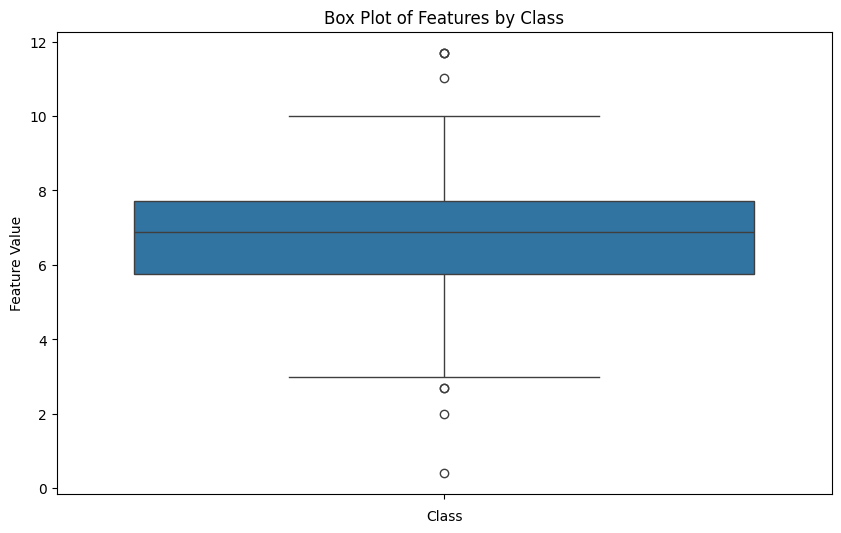

In [67]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='PIC50', data=filter_df)
plt.title('Box Plot of Features by Class')
plt.xlabel('Class')
plt.ylabel('Feature Value')
plt.show()
#black circles signify outliers


In [58]:
df_robust.shape

(6272, 215)

In [59]:
#there are some invalid entries(values tending to infinity) that were giving errors in the subsequent steps, this code is to remove those invalid entries

invalid_count = 0

# Maximum value for float32
float32_threshold = np.finfo(np.float32).max

# Iterate through all rows and columns
rows_to_drop = []

for index, row in df_robust.iterrows():
    for value in row:
        # Check if the value is numeric before applying isinf or comparing thresholds
        if pd.api.types.is_numeric_dtype(type(value)):
            if pd.isnull(value) or np.isinf(value) or abs(value) > float32_threshold:
                rows_to_drop.append(index)
                invalid_count += 1
                break  # Break after marking the row to drop
        else:
            # If it's not numeric, just check for NaN
            if pd.isnull(value):
                rows_to_drop.append(index)
                invalid_count += 1
                break

# Drop rows that contain invalid values
df_robust.drop(rows_to_drop, inplace=True)

# Output the number of invalid entries dropped
print(f"Dropped {invalid_count} invalid entries.")


Dropped 0 invalid entries.


In [60]:
df_robust.shape

(6272, 215)

In [69]:
#spitting into X features and y target for model
y = df_robust['Activity Rank']
X = df_robust.drop(columns=['Smiles', 'PIC50','Activity Rank','Standard Value','Standard Type'])

In [70]:
print(y.head())
print(X.head())

0    Rank 2 - Moderate Activity
1         Rank 3 - Low Activity
2         Rank 3 - Low Activity
3    Rank 2 - Moderate Activity
4    Rank 2 - Moderate Activity
Name: Activity Rank, dtype: object
   MaxAbsEStateIndex  MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex  \
0           0.653725        0.653725           0.290430       -1.745846   
1          -0.154252       -0.154252          -0.417777        0.778691   
2           0.337199        0.337199          -0.394342        0.602483   
3           0.128842        0.128842          -0.659231        0.511082   
4           0.784263        0.784263           0.564227       -1.485368   

        qed       SPS     MolWt  HeavyAtomMolWt  ExactMolWt  \
0 -0.234714  2.927289  1.144499        1.092375    1.143715   
1  1.143936 -0.320234 -0.744458       -0.738116   -0.744582   
2 -0.123327  0.804894  0.854269        0.855762    0.854307   
3 -0.233335 -0.231312  0.096672        0.029244    0.096711   
4 -0.751720 -0.079840  0.681744        

In [71]:
#FEATURE SELECTION - can be done using rfe or feature importance
#you can experiment using different number of features and examining the model performance in the subsequent steps

import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Initialize RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the RandomForestClassifier on the entire dataset
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame to map features to their importances
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Extract the top 25 features
selected_features = importance_df.head(25)['Feature'].tolist()

print("Top n features:", selected_features)


Top n features: ['fr_N_O', 'PEOE_VSA3', 'BCUT2D_MRLOW', 'PEOE_VSA2', 'VSA_EState3', 'MinEStateIndex', 'BCUT2D_MRHI', 'VSA_EState4', 'MaxAbsPartialCharge', 'MaxPartialCharge', 'SMR_VSA3', 'BCUT2D_MWHI', 'EState_VSA9', 'BCUT2D_LOGPLOW', 'MinPartialCharge', 'MinAbsPartialCharge', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'VSA_EState2', 'VSA_EState8', 'VSA_EState5', 'qed', 'BalabanJ', 'PEOE_VSA8', 'PEOE_VSA7']


In [72]:
#X data filter to have only the required columns based in selected features
X_selected = pd.DataFrame(X, columns=selected_features)

X_selected.head()

,fr_N_O,PEOE_VSA3,BCUT2D_MRLOW,PEOE_VSA2,VSA_EState3,MinEStateIndex,BCUT2D_MRHI,VSA_EState4,MaxAbsPartialCharge,MaxPartialCharge,...,MinAbsPartialCharge,BCUT2D_MWLOW,BCUT2D_CHGHI,VSA_EState2,VSA_EState8,VSA_EState5,qed,BalabanJ,PEOE_VSA8,PEOE_VSA7
0,-1.0,-0.099543,-0.103764,0.879181,-0.289062,-1.745846,2.313730,-1.606623,-0.267488,-0.971137,...,-0.970398,-0.882274,1.038138,2.118019,1.840271,0.135982,-0.234714,-0.236674,-0.321735,1.515377
1,-1.0,-1.099543,1.132431,-2.006788,0.236219,0.778691,0.063846,-0.238745,0.975029,-0.607409,...,-0.603831,-0.272728,-0.498201,-0.737726,-0.411855,0.131329,1.143936,0.354697,-1.047595,-0.130875
2,-1.0,0.862447,1.018111,-2.006788,-1.406944,0.602483,0.070539,2.290466,0.508943,5.064290,...,5.112147,-0.302044,0.424459,0.589371,0.759328,0.746830,-0.123327,-1.231672,0.429245,0.390828
3,0.0,0.000000,-0.025654,0.000000,0.103175,0.511082,-0.025371,1.445658,-0.171759,-0.686892,...,-0.683934,-0.274773,-0.396516,0.061975,1.626854,-0.003655,-0.233335,0.227593,0.714320,1.273439
4,0.0,1.761811,-0.025661,0.000000,0.009819,-1.485368,-0.027907,-0.219486,-0.103412,-0.771744,...,-0.769449,-2.345917,0.783425,-0.043693,-0.265300,-0.954705,-0.751720,-0.032401,0.079303,1.144967


In [73]:
#combining X and y as data to split it into train and test
data=X_selected.copy()
data['bioactivity_class']=y

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
target = 'bioactivity_class'

In [74]:
#WITHOUT TAKING HYPERPARAMETER TUNING INTO CONSIDERATION
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Splitting the data into features (X) and target (y)
X_train = train_data.drop(columns=[target])
y_train = train_data[target]
X_test = test_data.drop(columns=[target])
y_test = test_data[target]

# Initializing the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=25, random_state=42)

# Fitting the model on the training data
rf_classifier.fit(X_train, y_train)

# Making predictions on the test data
y_pred = rf_classifier.predict(X_test)

y_train_pred=rf_classifier.predict(X_train)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.76
Classification Report:
                            precision    recall  f1-score   support

    Rank 1 - High Activity       0.64      0.56      0.60       221
Rank 2 - Moderate Activity       0.77      0.83      0.80       683
     Rank 3 - Low Activity       0.82      0.75      0.79       351

                  accuracy                           0.76      1255
                 macro avg       0.74      0.71      0.73      1255
              weighted avg       0.76      0.76      0.76      1255

Confusion Matrix:
[[123  91   7]
 [ 64 569  50]
 [  5  82 264]]


In [75]:
# Print classification report for training
print("Classification Report:")
print(classification_report(y_train, y_train_pred))

Classification Report:
                            precision    recall  f1-score   support

    Rank 1 - High Activity       0.91      0.91      0.91       868
Rank 2 - Moderate Activity       0.96      0.97      0.96      2665
     Rank 3 - Low Activity       0.98      0.97      0.98      1484

                  accuracy                           0.96      5017
                 macro avg       0.95      0.95      0.95      5017
              weighted avg       0.96      0.96      0.96      5017



In [76]:
#WITH HYPERPARAMETER TUNING
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Splitting the data into features (X) and target (y)
X_train = train_data.drop(columns=[target])
y_train = train_data[target]
X_test = test_data.drop(columns=[target])
y_test = test_data[target]

# Initializing the Random Forest Classifier with adjustments
rf_classifier = RandomForestClassifier(
    n_estimators=150,          # Increase number of trees
    max_depth=8,              # Limit maximum depth of trees
    min_samples_split=5,       # Minimum samples to split a node
    min_samples_leaf=3,        # Minimum samples at a leaf node
    random_state=42,
    max_features='sqrt'
)

# Fitting the model on the training data
rf_classifier.fit(X_train, y_train)

# Making predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Optionally, you can also evaluate training predictions
y_train_pred = rf_classifier.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))


Accuracy: 0.72
Classification Report:
                            precision    recall  f1-score   support

    Rank 1 - High Activity       0.79      0.24      0.37       221
Rank 2 - Moderate Activity       0.69      0.92      0.79       683
     Rank 3 - Low Activity       0.83      0.64      0.72       351

                  accuracy                           0.72      1255
                 macro avg       0.77      0.60      0.63      1255
              weighted avg       0.74      0.72      0.69      1255

Confusion Matrix:
[[ 54 164   3]
 [ 11 628  44]
 [  3 124 224]]
Training Accuracy: 0.7735698624676102


In [77]:
# Print classification report
print("Classification Report:")
print(classification_report(y_train, y_train_pred))


Classification Report:
                            precision    recall  f1-score   support

    Rank 1 - High Activity       0.84      0.33      0.47       868
Rank 2 - Moderate Activity       0.72      0.96      0.82      2665
     Rank 3 - Low Activity       0.93      0.70      0.80      1484

                  accuracy                           0.77      5017
                 macro avg       0.83      0.66      0.70      5017
              weighted avg       0.80      0.77      0.75      5017



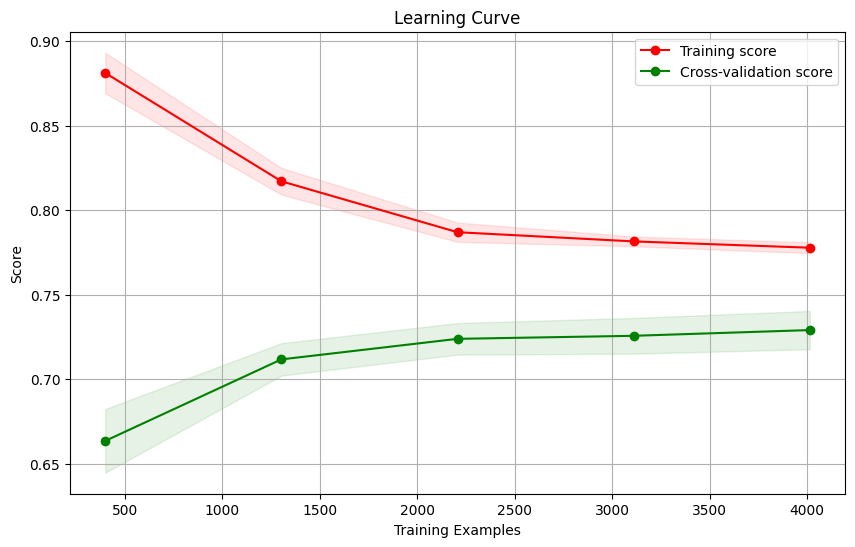

In [78]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, title="Learning Curve", cv=5, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training Examples")
    plt.ylabel("Score")

    # Calculate learning curve
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')

    # Mean and standard deviation for training and validation scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot the learning curve
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

# Plot learning curve for the RandomForestClassifier
plot_learning_curve(rf_classifier, X_train, y_train)

In [82]:
! pip install lazypredict
import lazypredict
from lazypredict.Supervised import LazyClassifier

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
lazy_class = LazyClassifier()
train,test = lazy_class.fit(X_train, X_test, y_train, y_test)

# Print the results
print(train)

 90%|████████▉ | 26/29 [00:44<00:04,  1.49s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002212 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6119
[LightGBM] [Info] Number of data points in the train set: 7273, number of used features: 24
[LightGBM] [Info] Start training from score -1.632808
[LightGBM] [Info] Start training from score -0.665618
[LightGBM] [Info] Start training from score -1.235587


100%|██████████| 29/29 [00:45<00:00,  1.56s/it]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
ExtraTreesClassifier               0.83               0.81    None      0.82   
LGBMClassifier                     0.82               0.81    None      0.82   
RandomForestClassifier             0.82               0.80    None      0.82   
BaggingClassifier                  0.81               0.80    None      0.81   
LabelSpreading                     0.79               0.79    None      0.79   
LabelPropagation                   0.79               0.78    None      0.79   
SVC                                0.80               0.78    None      0.80   
KNeighborsClassifier               0.79               0.78    None      0.79   
DecisionTreeClassifier             0.77               0.76    None      0.77   
AdaBoostClassifier                 0.77               0.76    None      0.77   
LogisticRegression                 0.78 

In [81]:
print(test)

NameError: name 'test' is not defined

**HYPERPARAMETER TUNING: Some extra information**

To increase the accuracy of the model and reduce overfitting, the hyperparameters of the model can be changed accordingly.

`n_estimators:`

This parameter defines the number of trees in the forest.
Increasing the number of trees can improve the model's performance and stability (reducing variance) but also increases computation time. Too many trees can lead to diminishing returns, so it's essential to find a balance.

`max_depth:`

This sets the maximum depth of each tree.
Limiting the depth can help prevent overfitting by making the trees simpler. If the depth is too shallow, it may lead to underfitting, while a very deep tree can capture noise and lead to overfitting.

`min_samples_split:`

This specifies the minimum number of samples required to split an internal node.
Increasing this value makes the algorithm more conservative, leading to fewer splits and potentially simpler trees, which can reduce overfitting. Conversely, a lower value may capture more complex patterns but can also increase the risk of overfitting.

`min_samples_leaf:`

This sets the minimum number of samples that must be present in a leaf node.
Increasing this value results in larger leaves, which can smooth the model and help reduce overfitting. A lower value allows for more detailed splits, potentially capturing more patterns in the data but risking overfitting.

`random_state:`

Changing the random_state value does not affect the model's performance but alters the randomness in the selection of samples and features, leading to potentially different results across runs. Setting it to a fixed number helps in comparing different model configurations.

`max_features:`

This determines the number of features to consider when looking for the best split.
Using 'sqrt' means that the algorithm will consider the square root of the total number of features. This can help reduce correlation between trees, improving diversity and generalization. Setting it to a higher value (like 'log2' or a specific number) can lead to better model performance, but may also increase overfitting.

There are a few different ways by which we can try hyperparameter tuning

Optuna, GridSearchCV, RandomizedSearchCV: Different combinations of hypermeters are taken and it gives the best parameters

In [ ]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.5 MB/s eta 0:00:00


In [ ]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


def objective(trial):
    # Suggest hyperparameters
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 5, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)
    max_features = trial.suggest_categorical('max_features', ['sqrt','log2',None])

    # Create and evaluate the model
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )

    score = cross_val_score(model, X_selected, y, n_jobs=-1, cv=3).mean()
    return score

# Create a study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Print the best hyperparameters
print("Best hyperparameters: ", study.best_params)


[I 2024-09-21 13:25:18,002] A new study created in memory with name: no-name-95e1f5e4-6a33-42cf-9784-857292e87d55
[I 2024-09-21 13:25:53,577] Trial 0 finished with value: 0.793111336867768 and parameters: {'n_estimators': 216, 'max_depth': 43, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 0 with value: 0.793111336867768.
[I 2024-09-21 13:27:32,298] Trial 1 finished with value: 0.7920113720378966 and parameters: {'n_estimators': 220, 'max_depth': 42, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': None}. Best is trial 0 with value: 0.793111336867768.
[I 2024-09-21 13:29:23,755] Trial 2 finished with value: 0.793991352286004 and parameters: {'n_estimators': 219, 'max_depth': 28, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': None}. Best is trial 2 with value: 0.793991352286004.
[I 2024-09-21 13:29:41,285] Trial 3 finished with value: 0.7947613929984222 and parameters: {'n_estimators': 171, 'max_depth': 15, 'min_sampl

Best hyperparameters:  {'n_estimators': 80, 'max_depth': 41, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import make_classification

In [ ]:
rf = RandomForestClassifier(random_state=42)
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
}
randomized_search = RandomizedSearchCV(estimator=rf,
                                       param_distributions=param_dist,
                                       n_iter=50,  # Number of parameter settings to sample
                                       scoring='accuracy',
                                       cv=5,
                                       verbose=2,
                                       n_jobs=-1,
                                       random_state=42)  # For reproducibility
randomized_search.fit(X_train, y_train)
print("Best Parameters:", randomized_search.best_params_)
print("Best Cross-validation Score:", randomized_search.best_score_)
best_rf = randomized_search.best_estimator_
test_score = best_rf.score(X_test, y_test)
print("Test Score:", test_score)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
125 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
66 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils

Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}
Best Cross-validation Score: 0.8191922744224961
Test Score: 0.8185816382627817


In [ ]:
from google.colab import files
data=files.upload()

Saving solubility_test.csv to solubility_test (1).csv


In [ ]:
solubility_test = pd.read_csv('solubility_test.csv', names=['name','smiles'])

In [ ]:
solubility_test

,name,smiles
0,Ethanol,CCO
1,Acetic Acid,CC(=O)O
2,Glucose,C(C1C(C(C(C1O)O)O)O)O)O
3,Urea,NC(=O)N
4,Glycerol,C(C(C(CO)O)O)O
5,Hexane,CCCCCC
6,Benzene,c1ccccc1
7,Octadecane,CCCCCCCCCCCCCCCCCCC
8,Cyclohexane,C1CCCCC1
9,Cholesterol,CC(C)C1CCC2C(C1)CC(C2(C)C)C(C)C(C)C


In [ ]:
descriptor_names = [desc_name[0] for desc_name in Descriptors._descList] #208, list exists in rdkit, wol wt


calculator = MoleculeDescriptors.MolecularDescriptorCalculator(descriptor_names)


def calculate_descriptors(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles) # converting smiles to "molecular object"
        if mol is not None:
            return calculator.CalcDescriptors(mol)
        else:
            return [None] * len(descriptor_names)
    except:
        return [None] * len(descriptor_names)


descriptors = solubility_test['smiles'].apply(calculate_descriptors) # calculating descriptors for all smiles in our original dataframe
desc = pd.DataFrame(descriptors.tolist(), columns=descriptor_names) # Adding these descriptors as lists to a new data frame, whose column heading is the descriptor name
results_dt = pd.concat([solubility_test, desc], axis=1) # make a final data frame


[17:04:31] DEPRECATION WARNING: please use MorganGenerator
[17:04:31] DEPRECATION WARNING: please use MorganGenerator
[17:04:31] DEPRECATION WARNING: please use MorganGenerator
[17:04:31] DEPRECATION WARNING: please use MorganGenerator
[17:04:31] DEPRECATION WARNING: please use MorganGenerator
[17:04:31] DEPRECATION WARNING: please use MorganGenerator
[17:04:31] SMILES Parse Error: extra close parentheses while parsing: C(C1C(C(C(C1O)O)O)O)O)O
[17:04:31] SMILES Parse Error: Failed parsing SMILES 'C(C1C(C(C(C1O)O)O)O)O)O' for input: 'C(C1C(C(C(C1O)O)O)O)O)O'
[17:04:31] DEPRECATION WARNING: please use MorganGenerator
[17:04:31] DEPRECATION WARNING: please use MorganGenerator
[17:04:31] DEPRECATION WARNING: please use MorganGenerator
[17:04:31] DEPRECATION WARNING: please use MorganGenerator
[17:04:31] DEPRECATION WARNING: please use MorganGenerator
[17:04:31] DEPRECATION WARNING: please use MorganGenerator
[17:04:31] DEPRECATION WARNING: please use MorganGenerator
[17:04:31] DEPRECATION 

In [ ]:
cleaned_dt= results_dt.dropna()
print(f"Original DataFrame shape: {results_dt.shape}")
print(f"Cleaned DataFrame shape: {cleaned_dt.shape}")

Original DataFrame shape: (10, 212)
Cleaned DataFrame shape: (9, 212)


In [ ]:
from sklearn.preprocessing import RobustScaler # robust to outliers
robust_dt = cleaned_dt.copy()

# numeric columns excluding 'FDA_APPROVED'
numeric_columns1 = robust_dt.select_dtypes(include=['float64', 'int64']).columns
numeric_columns1 = [col for col in numeric_columns1]

scaler = RobustScaler()

# scale selected numeric columns
robust_dt[numeric_columns1] = scaler.fit_transform(robust_dt[numeric_columns1])

robust_dt

,name,smiles,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,Ethanol,CCO,0.80,0.80,-0.73,-0.15,-0.22,-0.26,-0.61,-0.57,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,Acetic Acid,CC(=O)O,1.03,1.03,0.00,-0.64,0.10,-0.23,-0.39,-0.29,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,Urea,NC(=O)N,1.03,1.03,0.00,-0.64,-0.72,-0.26,-0.39,-0.29,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
4,Glycerol,C(C(C(CO)O)O)O,0.94,0.94,-0.39,-0.82,-1.16,0.77,0.61,0.71,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,Hexane,CCCCCC,-0.06,-0.06,0.66,0.35,0.56,0.00,0.03,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,0.00
6,Benzene,c1ccccc1,-0.09,-0.09,1.47,0.64,0.28,-0.09,-0.10,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,Octadecane,CCCCCCCCCCCCCCCCCCC,-0.05,-0.05,0.68,0.36,-2.36,0.17,2.97,2.79,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,16.00,0.00
8,Cyclohexane,C1CCCCC1,-0.17,-0.17,0.84,0.42,0.00,1.28,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,Cholesterol,CC(C)C1CCC2C(C1)CC(C2(C)C)C(C)C(C)C,0.00,0.00,-0.32,0.00,2.26,2.61,2.91,2.79,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
filter_dt=pd.DataFrame(robust_dt,columns=selected_features)
filter_dt

,MolLogP,MolMR,PEOE_VSA6,LabuteASA,Ipc,SlogP_VSA2,Chi3v,Chi0v,Chi2v,Chi1v,...,BCUT2D_LOGPHI,MaxAbsPartialCharge,BertzCT,Chi2n,Chi0,Chi1n,PEOE_VSA1,BCUT2D_LOGPLOW,SMR_VSA7,HeavyAtomMolWt
0,-0.65,-0.85,-0.92,-0.86,-0.63,1.06,-0.55,-0.84,-0.74,-0.65,...,-0.81,1.00,-0.47,-0.74,-0.51,-0.65,1.00,0.50,0.00,-0.57
1,-0.62,-0.82,-0.92,-0.68,-0.62,1.00,-0.55,-0.76,-0.61,-0.69,...,-0.65,1.26,-0.04,-0.61,-0.22,-0.69,1.00,0.10,0.00,-0.29
3,-1.03,-0.79,-0.92,-0.70,-0.62,0.54,-0.55,-0.88,-0.68,-0.77,...,-0.87,0.87,0.00,-0.68,-0.22,-0.77,2.25,-0.67,0.00,-0.29
4,-1.54,-0.02,-0.92,0.32,0.38,4.14,0.00,0.05,0.00,0.00,...,0.00,0.99,0.34,0.00,0.78,0.00,4.00,-0.92,0.00,0.71
5,0.35,0.21,0.08,0.04,-0.27,0.00,0.09,0.24,0.13,0.31,...,0.10,0.00,-0.30,0.13,0.20,0.31,0.00,0.33,0.00,0.00
6,0.00,0.00,0.00,-0.09,0.00,0.00,-0.10,-0.31,-0.22,-0.15,...,-0.12,-0.01,0.76,-0.22,0.00,-0.15,0.00,0.68,36.40,0.00
7,2.31,3.95,2.19,3.65,326.62,0.00,2.26,3.95,3.00,3.60,...,0.35,-0.00,1.66,3.00,3.27,3.60,0.00,0.00,0.00,2.79
8,0.25,0.08,0.05,0.00,0.00,0.00,0.45,0.00,0.39,0.35,...,0.37,-0.04,-0.24,0.39,0.00,0.35,0.00,-0.05,0.00,0.00
9,1.67,3.65,0.31,3.56,302.25,0.00,4.20,4.10,4.65,3.26,...,1.00,-0.01,4.79,4.65,3.39,3.26,0.00,-0.97,0.00,2.79


In [ ]:
dt_pred = rf_classifier.predict(filter_dt)
dt_pred

array(['Rank I', 'Rank I', 'Rank I', 'Rank II', 'Rank II', 'Rank II',
       'Rank III', 'Rank II', 'Rank III'], dtype=object)

In [ ]:
name_dt=pd.DataFrame(cleaned_dt,columns=['name','smiles'])
final_dt=name_dt.copy()
final_dt['bioactivity_class']=dt_pred
final_dt

,name,smiles,bioactivity_class
0,Ethanol,CCO,Rank I
1,Acetic Acid,CC(=O)O,Rank I
3,Urea,NC(=O)N,Rank I
4,Glycerol,C(C(C(CO)O)O)O,Rank II
5,Hexane,CCCCCC,Rank II
6,Benzene,c1ccccc1,Rank II
7,Octadecane,CCCCCCCCCCCCCCCCCCC,Rank III
8,Cyclohexane,C1CCCCC1,Rank II
9,Cholesterol,CC(C)C1CCC2C(C1)CC(C2(C)C)C(C)C(C)C,Rank III


In [ ]:
display_df=pd.concat([final_dt,dt_pred_proba],axis=1)

NameError: name 'dt_pred_proba' is not defined

In [ ]:
#selecting rank 1
rank1_comp=final_dt[final_dt['bioactivity_class']=='Rank I']
rank1_comp

,name,smiles,bioactivity_class
0,Ethanol,CCO,Rank I
1,Acetic Acid,CC(=O)O,Rank I
3,Urea,NC(=O)N,Rank I


In [ ]:
leads=rank1_comp['smiles']
leads

,smiles
0,CCO
1,CC(=O)O
3,NC(=O)N
